# 활성화 함수 (Activation Function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(-5,5,100)

### Step Function (계단 함수)
- 입력값이 0 이상이면 1, 그렇지 않으면 0
- 미분 불가 & 작은 변화에도 값이 급격히 변해서 역전파 학습에 부적합

In [7]:
def step_function(x):
    return np.where(x >=0, 1, 0)

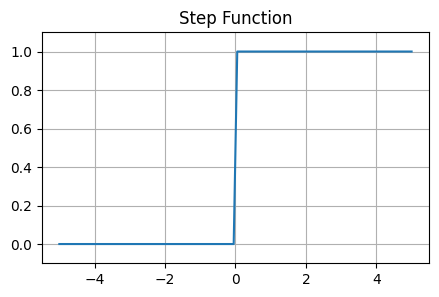

In [9]:
plt.figure(figsize=(5,3))
plt.plot(x, step_function(x))
plt.title('Step Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid Function
- 출력 범위 (0,1)
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(Vanishing Gradient) 문제 발생 가능

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

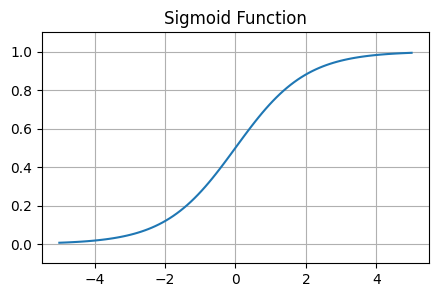

In [11]:
plt.figure(figsize=(5,3))
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### Hyperbolic Tangent (Tanh)
- 출력 범위: (-1,1)
- 시그모이드보다 중심이 0에 가까워 더 빠른 학습 진행 가능
- 기울기 소실 문제 발생 가능

In [15]:
def tanh(x):
    #return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return np.tanh(x)

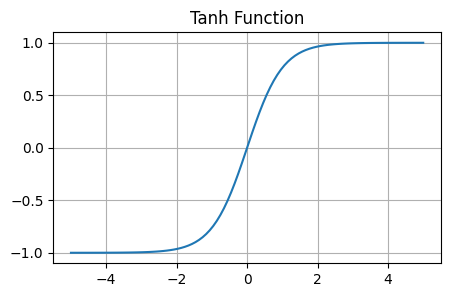

In [16]:
plt.figure(figsize=(5,3))
plt.plot(x, tanh(x))
plt.title('Tanh Function')
plt.grid()
plt.ylim(-1.1, 1.1)
plt.show()

### ReLu (Rectifier Linear Unit)

- 출력 범위 $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLU) 문제 발생 가능

In [19]:
def relu(x):
    return np.maximum(0,x)

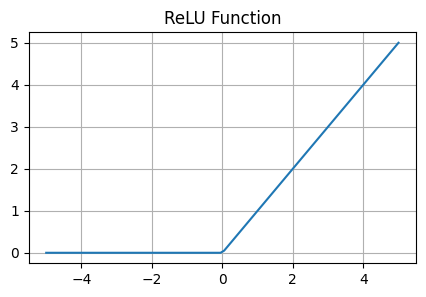

In [21]:
plt.figure(figsize=(5,3))
plt.plot(x, relu(x))
plt.title('ReLU Function')
plt.grid()
plt.show()

### Leaky ReLU
- 출력 범위: $(-\infty, \infty)$
- ReLU의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$ 를 적용 ($\alpha$ 는 일반적으로 0.01 사용)

In [28]:
def leaky_relu(x, alpha=0.1):
    return np.where(x >=0, x, alpha * x)

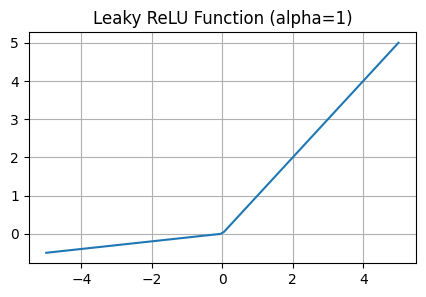

In [30]:
plt.figure(figsize=(5,3))
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Function (alpha=1)')
plt.grid()
plt.show()

---

In [31]:
import pandas as pd

np.random.seed(42)
X = np.random.uniform(-5,5, size=10)

df = pd.DataFrame({
    "Input(X)": X,
    "Step": step_function(X),
    "Sigmoid": sigmoid(X),
    "Tanh": tanh(X),
    "ReLU": relu(X),
    "Leaky ReLU": leaky_relu(X)
})

df

,Input(X),Step,Sigmoid,Tanh,ReLU,Leaky ReLU
0,-1.254599,0,0.221905,-0.849568,0.000000,-0.125460
1,4.507143,1,0.989090,0.999757,4.507143,4.507143
2,2.319939,1,0.910515,0.980867,2.319939,2.319939
3,0.986585,1,0.728413,0.755902,0.986585,0.986585
4,-3.439814,0,0.031074,-0.997945,0.000000,-0.343981
5,-3.440055,0,0.031067,-0.997946,0.000000,-0.344005
6,-4.419164,0,0.011901,-0.999710,0.000000,-0.441916
7,3.661761,1,0.974956,0.998681,3.661761,3.661761
8,1.011150,1,0.733245,0.766237,1.011150,1.011150
9,2.080726,1,0.889016,0.969308,2.080726,2.080726


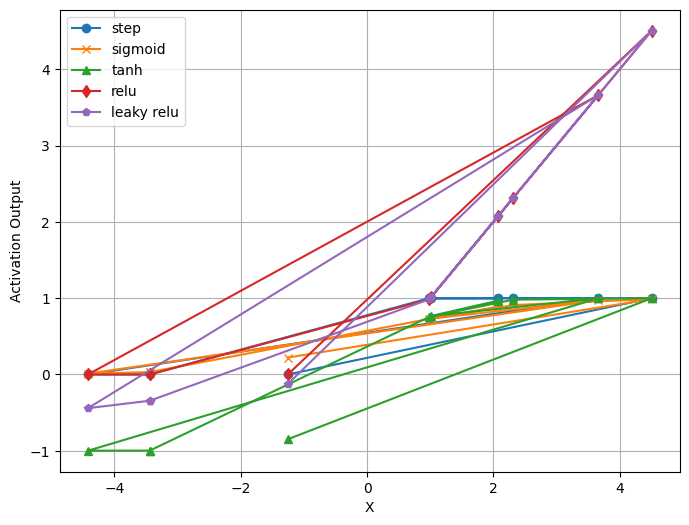

In [33]:
plt.figure(figsize=(8,6))
plt.plot(df['Input(X)'], df['Step'], marker='o', label='step')
plt.plot(df['Input(X)'], df['Sigmoid'], marker='x', label='sigmoid')
plt.plot(df['Input(X)'], df['Tanh'], marker='^', label='tanh')
plt.plot(df['Input(X)'], df['ReLU'], marker='d', label='relu')
plt.plot(df['Input(X)'], df['Leaky ReLU'], marker='p', label='leaky relu')

plt.xlabel('X')
plt.ylabel('Activation Output')
plt.legend()
plt.grid()
plt.show()